# a staright line

In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

In [2]:
l= 0.05 #m

n = 100
t = np.arange(0,n,1)

#state space
xr = np.arange(0,100,1)
yr = 1
theta_r = np.zeros(n)
vr = 0.1
lam = [1, -1, -1]

def f(t,yy):
    x = yy[0]
    y = yy[1]
    theta = yy[2]
    
    a1=-lam[1]-lam[2]
    a2=lam[1]*lam[2]
    
    K = -1 * np.array([[lam[0], 0, 0],
                      [0, a1*l/vr, a2*l/vr]])

    e = np.array([x - vr*t, y-yr, theta])
    ud = np.array([vr,0])
    v, phi = K@e+ud
    return [v * np.cos(theta), v * np.sin(theta), v / l * np.tan(phi)]

yinit = [0, -0.5, 0.1]

yy = scipy.integrate.solve_ivp(f, [0,100], yinit, method='RK45')


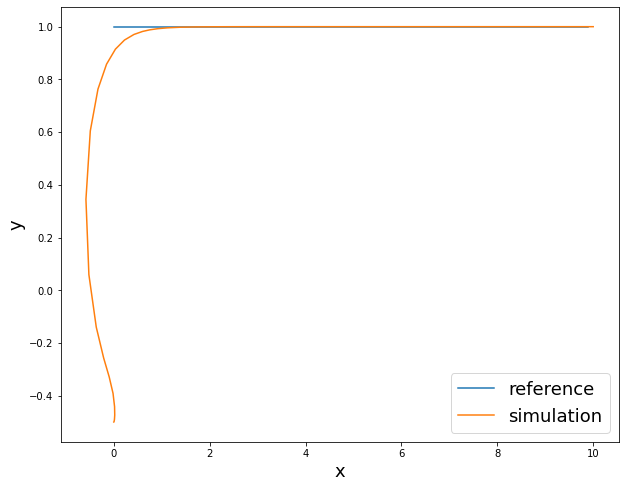

In [3]:
plt.figure(figsize=(10, 8))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.plot(np.arange(0,10,0.1),np.ones(100),label='reference')
plt.plot(yy.y[0],yy.y[1],label='simulation')
plt.legend(prop={'size': 18})

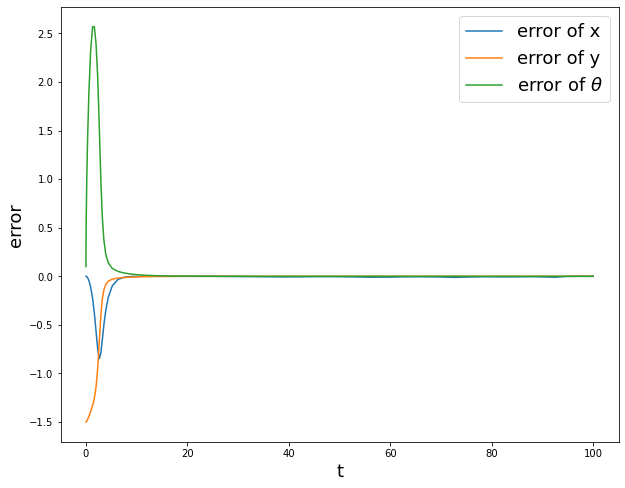

In [4]:
# plot error
plt.figure(figsize=(10, 8))
plt.plot(yy.t,yy.y[0]-yy.t*vr,label='error of x')
plt.plot(yy.t,yy.y[1]-(1), label='error of y')
plt.plot(yy.t,yy.y[2], label=r'error of $\theta$')
plt.xlabel('t',fontsize=18)
plt.ylabel('error',fontsize=18)
plt.legend(prop={'size': 18})

In [5]:
yy = scipy.integrate.solve_ivp(f, [0,100], yinit, method='RK23')

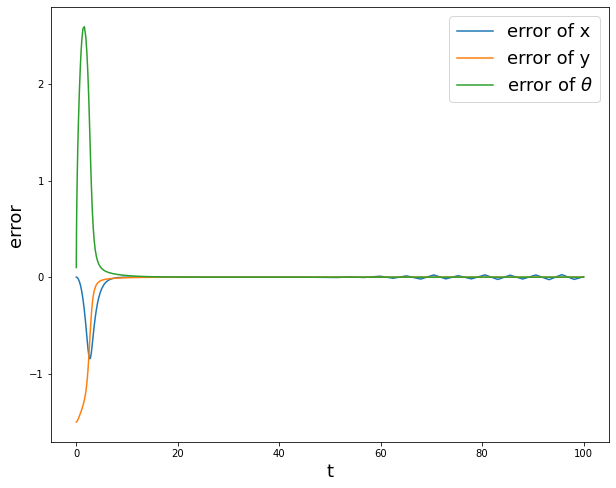

In [6]:
# plot error
plt.figure(figsize=(10, 8))
plt.plot(yy.t,yy.y[0]-yy.t*vr,label='error of x')
plt.plot(yy.t,yy.y[1]-(1), label='error of y')
plt.plot(yy.t,yy.y[2], label=r'error of $\theta$')
plt.xlabel('t',fontsize=18)
plt.ylabel('error',fontsize=18)
plt.legend(prop={'size': 18})

# on arbitary trajectory

In [7]:
pip install autograd

Note: you may need to restart the kernel to use updated packages.


In [8]:
import autograd.numpy as np
from autograd import grad

In [9]:
l= 0.05 #m

def traj(xr):
    yr = 0.5 * np.sin(xr)
    return yr

def theta(xr):
    grad_fct = grad(traj)
    theta_r=[]
    for i in xr:
        theta_r.append(np.arctan(grad_fct(i)))
    return theta_r



vr = 0.1 # speed on x direction
lam = [1, -1, -1]

def f(t,yy):
    x = yy[0]
    y = yy[1]
    theta = yy[2]
    
    xr = vr * t
    yr = traj(xr)
    grad_fct = grad(traj)
    theta_r = np.arctan(grad_fct(xr))
    phi_r = (np.arctan(grad_fct(xr+0.1))-np.arctan(grad_fct(xr)))*l/(vr/np.cos(theta_r))
    
    a1=-lam[1]-lam[2]
    a2=lam[1]*lam[2]
    
    K = -1 * np.array([[lam[0], 0, 0],
                      [0, a1*l/vr, a2*l/vr]])
    
    e = np.array([(x - xr) * np.cos(theta_r) + (y-yr)*np.sin(theta_r), -(x-xr)*np.sin(theta_r)+(y-yr)*np.cos(theta_r), (theta-theta_r)])
    ud = np.array([vr/np.cos(theta_r),phi_r])
    v, phi = K@e+ud
    
    return [v * np.cos(theta), v * np.sin(theta), v / l * np.tan(phi)]

yinit = [0, -.5, 0.1]

yy = scipy.integrate.solve_ivp(f, [0,500], yinit, method='RK45')



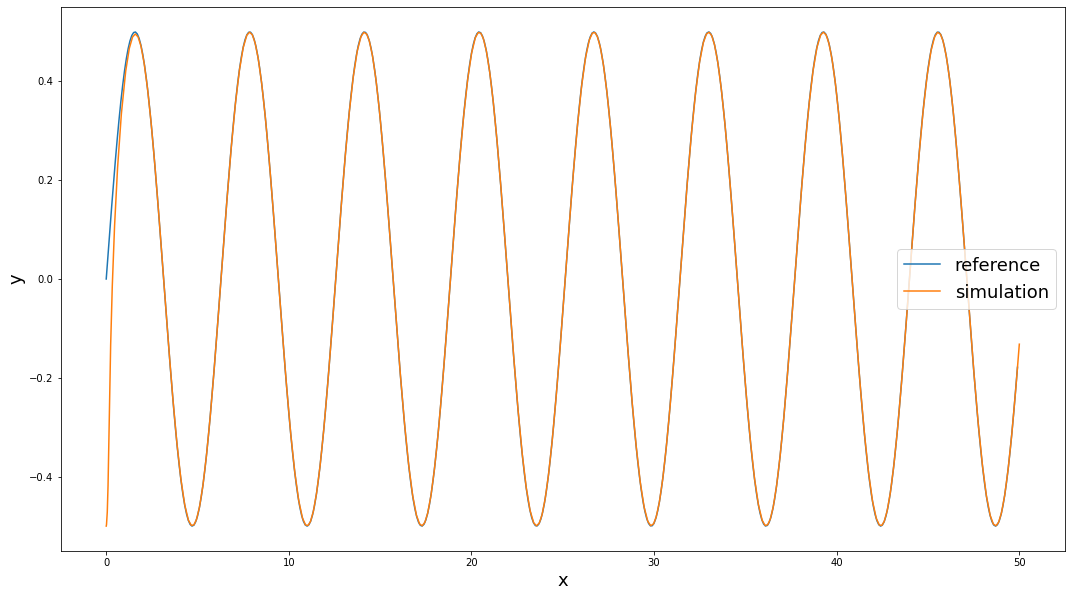

In [10]:

plt.figure(figsize=(18, 10))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
x=np.arange(0,50,0.1)
plt.plot(x,0.5*np.sin(x),label='reference')
plt.plot(yy.y[0],yy.y[1],label='simulation')
plt.legend(prop={'size': 18})

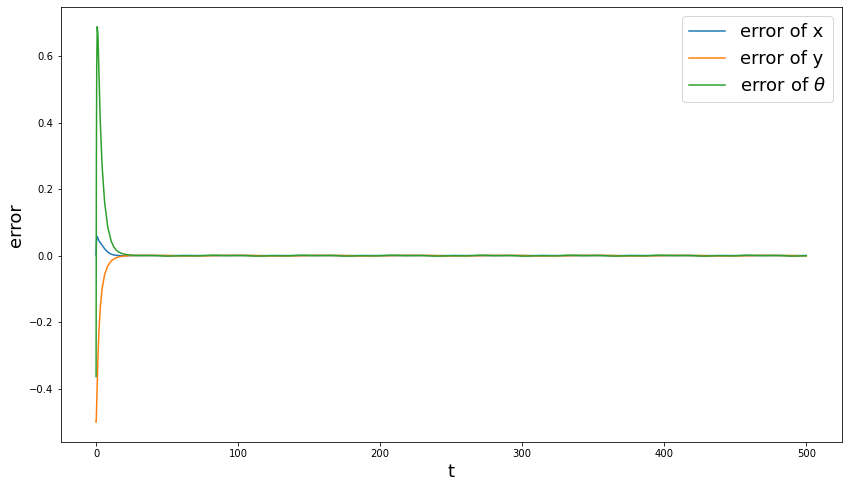

In [11]:
# plot error
plt.figure(figsize=(14, 8))
plt.plot(yy.t,(yy.y[0]-yy.t*vr),label='error of x')
plt.plot(yy.t,yy.y[1]-0.5*np.sin(yy.t*vr), label='error of y')
plt.plot(yy.t,yy.y[2]-theta(yy.t*vr), label=r'error of $\theta$')
plt.xlabel('t',fontsize=18)
plt.ylabel('error',fontsize=18)
plt.legend(prop={'size': 18})
#plt.yscale('log')

# Execution time

In [36]:
import time
start_time = time.time()
l= 0.05 #m

n = 100
t = np.arange(0,n,1)

#state space
xr = np.arange(0,100,1)
yr = 1
theta_r = np.zeros(n)
vr = 0.1
lam = [1, -1, -1]

def f(t,yy):
    x = yy[0]
    y = yy[1]
    theta = yy[2]
    
    a1=-lam[1]-lam[2]
    a2=lam[1]*lam[2]
    
    K = -1 * np.array([[lam[0], 0, 0],
                      [0, a1*l/vr, a2*l/vr]])

    e = np.array([x - vr*t, y-yr, theta])
    ud = np.array([vr,0])
    v, phi = K@e+ud
    return [v * np.cos(theta), v * np.sin(theta), v / l * np.tan(phi)]

yinit = [0, -0.5, 0.1]

yy = scipy.integrate.solve_ivp(f, [0,3000], yinit, method='RK45')
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.6422929763793945 seconds ---


In [38]:
## time points simulated
len(yy.t)

1008